In [18]:
# 리눅스에서 한글 설정
import matplotlib
import matplotlib.font_manager

#[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [21]:
import pandas as pd
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')

UCI 저장소에서 제공하는 피마인디언 데이타

1950년대까지 비만인이 없던 피마인디언 부족

그러나 페스트푸드 문화와 더불어 지금은 전체 부족의 60%가 당뇨이고 80%가 비만이다

샘플수(레코드) : 768

속성 : 8

- 정보1 (pregnant) : 과거 임신 횟수
- 정보2 (plasma) : 포도당 부하 검사 2시간 후 공복 혈당 농도 (mm Hg) 
- 정보3 (pressure) : 혈압(mm Hg) 
- 정보4 (thickness) :삼두근 피부 주름 두께(mm) 
- 정보5 (insulin) : 혈청 인슐린 (2hour, mu U/ml) 
- 정보6 (BMI) : 체질량지수 weight(kg)/(height(m)*height(m)) 
- 정보7 (pedigree) : 당뇨병 가족력 
- 정보8 (age) : 나이

클래스 : 당뇨(diabetes) (1:당뇨 / 0:당뇨아님)

In [23]:
df = pd.read_csv('./dataset/pima-indians-diabetes.csv', names=['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'BMI', 'pedigree', 'age', 'diabetes'])

df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.isnull().sum()
# null 값이 없는 깨끗한 데이터

pregnant     0
plasma       0
pressure     0
thickness    0
insulin      0
BMI          0
pedigree     0
age          0
diabetes     0
dtype: int64

In [26]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### [연습]
임신횟수(pregnant) 당 당뇨병 발생(diabetes) 확률을 구한다

In [34]:
temp = df[['pregnant', 'diabetes']]
temp.head()

,pregnant,diabetes
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1


임신횟수(pregnant) 당 당뇨병 발생(diabetes) 확률에 대한 평균을 구하고 싶다.

지난 시간 학습했던 group by 절로 구현하기

In [36]:
temp1 = temp.groupby(['pregnant']).mean()
temp1

temp2 = temp.groupby(by=['pregnant'], as_index=False).mean()
# as_index = False 는 pregnant 정보 옆에 새로운 index 를 만들어 줌
temp2

,pregnant,diabetes
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


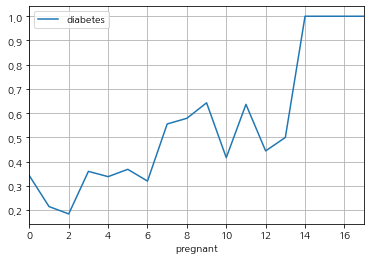

In [38]:
%matplotlib inline
temp1.plot(grid=True)

In [43]:
# 임신횟수가 14번 이상인 경우 확인
df[df['pregnant'] >= 14]

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [45]:
import matplotlib.pyplot as plt

# matplotlib 기반으로 좀 더 정교한 그래프를 그릴때 seaborn 라이브러리를 사용
import seaborn as sns

In [49]:
# 데이터간의 상관관계를 그래프로 표현
# 1 ~ -1 가까울 수록 양의 상관관계, 음의 상관관계, 0 -> 상관관계가 없음
# 1) 색상 구성 결정
colmap = plt.cm.gist_heat # 색상 구성 결정

In [50]:
plt.figure(figsize=(14, 14)) # 크기 설정

<Figure size 1008x1008 with 0 Axes>

<Figure size 1008x1008 with 0 Axes>

In [51]:
df.corr() #상관계수를 출력

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


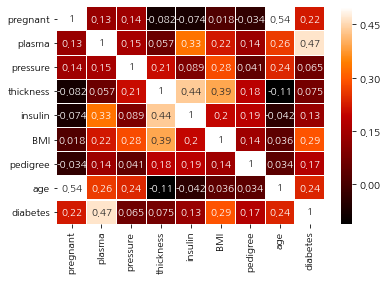

In [52]:
# 2) 그래프 속성 결정
# vmax 의 값을 0.5 로 지정해서 0.5 에 가까울 수록 밝은 색으로 표시한다
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colmap, linecolor='white', annot=True)
plt.show()

그림에서 diabetes 항목을 보면 pregnant 부터 age 까지 상관도가 숫자로 표시되어 있고 숫자가 높을수록 밝은 색상임을 알 수 있다.

그래프를 통해서 plasma 항목(공복 혈당 농도)가 diabetes 항목과 가장 상관관계가 높다는 것을 알 수 있다.

따라서, plasma가 결론을 만드는 가장 중요한 역할을 한다는 것을 예측할 수 있음.

In [53]:
# plasma 와 class 두 항목 간의 관계를 그래프로 확인

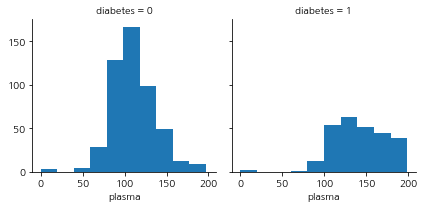

In [54]:
grid = sns.FacetGrid(df, col='diabetes')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

# 회귀분석
## 가. 회귀분석(Regression) 이란?

1) 독립변수(X)와 종속변수(Y)의 관계식을 구하는 기법
- 독립변수가 한 단위 증가할 때 종속변수가 얼마나 영향을 받는지 분석하는 방법

2) 추정 : 회귀식, 회귀계수

3) 검정 : 독립변수의 영향력, 모형의 적합성(R2) 등

예)

학력이 높으면 소득 수준이 높다.
공부하는 시간이 많으면 성적이 올라간다.

또한

* 소득수준이 같은 근로자 가구라도 소비지출액은 각각 다르게 나타난다.
* 동일한 등고선에 위치한 두 지역의 기온은 같은 온도로 나타나지 않는다.
* 동일한 아이큐를 지닌 학생들이라고해서 성적이 같게 나타나지 않는다.
* 이와 같이 사회과학 현상이나 자연과학 현상은 변수 사이에 존재하는 관련성에 오차가 있어 대부분 통계적 관계로 나타난다.
* 그러므로 변수 사이에 존재하는 관계식을 밝힐 때에는 통계적 분석이 이루어져야 한다.
* 만약 두 변수 X, Y 사이에 통계적 관계가 존재한다면, <U>두 변수는 확률적으로 관련성이 있다는 뜻이다. 독립변수 X 값을 알면 종속변수 Y 값을 정확하게 알 수 있다는 뜻이 아니다.</U>

* 종속변수와 독립변수가 어떠한 관계로 나타나는지 관련성 정도와 영향을 미치는 크기에 대하여 추정하고 가설 검정하는 내용을 다루는 것이 회귀분석이다.

# 선형회귀분석

## 회귀분석 

- 회귀 분석(Regression analysis)이란 통계적으로 데이터를 분석하는 방법 중 하나
- 입력에 대해서 연속적인 값을 대응시키는 문제 
- 회귀 분석이란 한 개 이상의 변수를 다룰 때 특정 변수가 다른 변수와 어떤 관계를 맺는지 분석하고, 이를 바탕으로 모델을 정의해 값을 예측하는 기법이다.
- 단순 선형회귀분석 : stats.linregress(x,y)
- 상관 분석(Correleation Analysis)
> 상관관계의 값을 파악할 수 있는 정도의 값을 상관계수
> (범위 -1 ~ 1 사이)

예) 

발이 큰 사람이 실제로 키가 크다면 두 변수 사이에는 강한 양의 상관관계를 가진다. 상관계수는 1에 가까울 것이다.

- 두 변수 사이에 상관관계가 없을 것이다.  ==>  0에 가깝다.  ==>  -1 음의 상관 관계를 말한다.

In [57]:
####################################################################
# 1. 회귀분석 : 1. 전기생산량과 소비량
# 독립변수(전기 생산량), 종속변수(전기소비량)
# 독립변수가 1개 이므로 단순회귀분석(선형회귀분석)을 사용한다.
# 귀무가설 : 전기 생산량과 전기소비량 사이에 상관관계가 없다.
# 대립가설 : 전기 생산량과 전기소비량 사이에 상관관계가 있다.
####################################################################

In [56]:
from scipy import stats

In [58]:
####################################################################
# 월별 전기생산 금액(억원)을 변수 x,
x = [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20]
# 이 때 전기 사용량(백만 Kw) 을 y로 한다
y = [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53]
####################################################################

In [60]:
# 독립변수 1, 종속변수가 1인데 연속형을 에측하려고 할 때, 단순 선형회귀 분석을 사용한다.
# stats.lingress(x,y) 선형회귀분석을 호출하는 함수이다.
# slope : 기울기, intercept : 절편, rvalue : 상관게수, pvalue : 예측기준(0.05), stderr : 에러 표준편차

slope, intercept, r_value, p_value, stderr = stats.linregress(x,y)

In [61]:
print('r_value (상관계수): ', r_value) # -1 ~ 1 사이
# 0.89 ==> 두 변수 간에 양의 상관 관계가 있다. ==> 통계학적으로 유의미하다 ==> 전기 생산량이 늘어나면 전기 소비량도 늘어난다.

r_value (상관계수):  0.8929235125385309


In [63]:
print("------------------------------------------------------")
print("p_value: ", p_value) # 0.05보다 적으면 유의미하다고 판정
# 귀무가설 기각, 대립가설이 채택됨
if p_value < 0.05:
    print("유의미하다")
else:
    print("유의미하지 않다")
print("------------------------------------------------------")    

# 9.238421943157766e-05 ==> e-05 10분의 5승분에 1, 아주 작은 수

------------------------------------------------------
p_value:  9.238421943157766e-05
유의미하다
------------------------------------------------------


In [64]:
# 결론 : 전기생산량과 전기소비량 간에 상관관계가 있다.
# 상관분석 : 두 변수간의 어떤 선형적인 관계가 있는지 분석

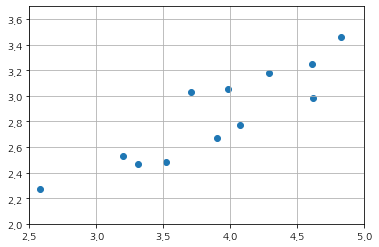

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim([2.5, 5.0]) # X 축의 시작좌표, 마지막좌표
ax.set_ylim([2.0, 3.7]) # Y 축의 시작좌표, 마지막좌표

# 산점도 그리기
plt.grid(True)
plt.scatter(x, y)

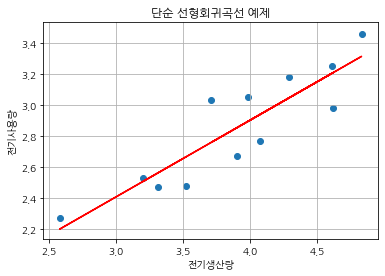

In [76]:
# 산점도 그리기
plt.grid(True)
plt.scatter(x, y)

# 회귀선 그리기
# 회귀선율 그리기 위해서는 numpy 배열로 변환 ****
# 회귀선 : 가장 [손실이 적은 선] 을 그어서 그것을 분석하는 것을 의미한다.
# 1차함수 : y = a(기울기)x + b(절편)
x1 = np.array(x)
#plot(x,y)
plt.plot(x1, slope * x1 + intercept, c='red')
plt.title('단순 선형회귀곡선 예제')
plt.xlabel('전기생산량')
plt.ylabel('전기사용량')
plt.show()

In [77]:
print('월별 생산 금액에 따른 전기 사용량', 5 * slope + intercept)

월별 생산 금액에 따른 전기 사용량 3.3975976081603942


In [78]:
print('월별 생산 금액에 따른 전기 사용량', 4 * slope + intercept)

월별 생산 금액에 따른 전기 사용량 2.901994372142104


### 연습문제1 

기온과 아이스크림 판매량

In [79]:
# 온도 X
X = [24, 25, 26, 27, 28, 29, 30, 31, 35]

# 아이스크림 판매량 Y
Y = [22, 25, 28, 30, 33, 34, 36, 32, 38]

# 단순 선형회귀분석
# 상관계수
# p_value 귀무가설, 대립가설
# 산점도 및 회귀곡선을 그래프로 그리시오

In [84]:
slope, intercept, r_value, p_value, stderr = stats.linregress(X,Y)

In [85]:
print('r_value (상관계수): ', r_value) # -1 ~ 1 사이

r_value (상관계수):  0.8984978897043424


In [86]:
print("------------------------------------------------------")
print("p_value: ", p_value) # 0.05보다 적으면 유의미하다고 판정
# 귀무가설 기각, 대립가설이 채택됨
if p_value < 0.05:
    print("유의미하다")
else:
    print("유의미하지 않다")
print("------------------------------------------------------")   

------------------------------------------------------
p_value:  0.000992076658523392
유의미하다
------------------------------------------------------


온도를 입력하세요 => 28.6


아이스크림 판매량 예측값 [31.25507246]


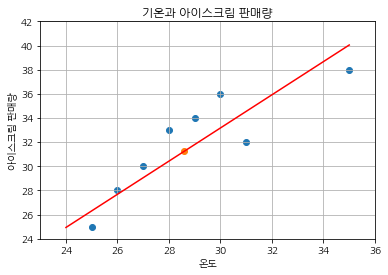

In [107]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim([23, 36]) # X 축의 시작좌표, 마지막좌표
ax.set_ylim([24, 42]) # Y 축의 시작좌표, 마지막좌표

# 산점도 그리기
plt.grid(True)
plt.scatter(X, Y)

X1 = np.array(X)
plt.plot(X1, slope * X1 + intercept, c='red')

xx_input = float(input('온도를 입력하세요 =>')) # 콘솔 입력

plt.title('기온과 아이스크림 판매량')
plt.xlabel('온도')
plt.ylabel('아이스크림 판매량')
xx = np.array([xx_input])

plt.scatter(xx, xx*slope+intercept)
print("아이스크림 판매량 예측값", xx*slope+intercept)
plt.show()

### 연습문제 2